1. 搭建的神经网络，使用olivettiface数据集进行训练。

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.transforms.v2 import ToTensor
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#加载数据集
olivetti_face = fetch_olivetti_faces(data_home = './data/olivetti_faces', shuffle = True)
# print(olivetti_face)
#拆分数据集
train_images, test_images, train_target, test_target = train_test_split(olivetti_face.data, olivetti_face.target, test_size = 0.2)
print(train_images.shape, test_images.shape, train_target.shape, test_target.shape)

(320, 4096) (80, 4096) (320,) (80,)


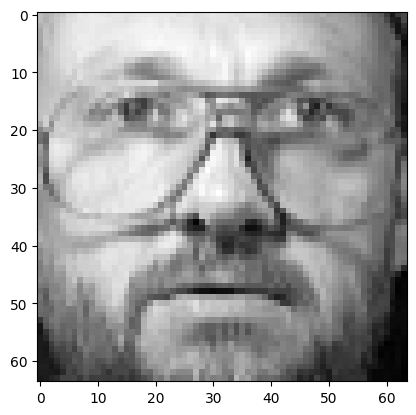

In [3]:
face = olivetti_face.images[0]
plt.imshow(face, cmap='gray')
plt.show()

In [4]:
#将数据转换为张量
train_images_tensor = torch.tensor(train_images, dtype = torch.float32)
test_images_tensor = torch.tensor(test_images, dtype = torch.float32)
train_target_tensor = torch.tensor(train_target, dtype = torch.int64)
test_target_tensor = torch.tensor(test_target, dtype = torch.int64)

In [5]:
#创建数据加载器
train_dataset = TensorDataset(train_images_tensor, train_target_tensor)
test_dataset = TensorDataset(test_images_tensor, test_target_tensor)
#创建数据加载器
train_loader = DataLoader(dataset = train_dataset, batch_size = 10, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 10, shuffle = True)

In [6]:
#参数设置
epochs = 1000
learning_rate = 0.001

In [7]:
#导入模型
from torch_nn_model import NN_Model_1,NN_Model_2,NN_Model_3,NN_Model_4
#创建模型
model = NN_Model_1()

In [8]:

#定义损失函数
loss_fn = torch.nn.CrossEntropyLoss()
#定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
#初始化损失记录列表
loss_history = []

#训练模型
def train_model(model,loss,optimizer,train_loader,epochs):
    model.train()
    loss_history.clear()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, target in train_loader:
            #前向传播
            output = model(images)
            #计算损失
            loss = loss_fn(output, target)
            #梯度清零
            optimizer.zero_grad()
            #反向传播
            loss.backward()
            #更新参数
            optimizer.step()
            #累计损失
            running_loss += loss.item()
        # 计算平均损失并记录
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        #打印信息
        if epoch % 100 == 0:
            print(f'Epoch:{epoch} Loss: {avg_loss}')
# 绘制损失曲线
def draw_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Epoch:0 Loss: 3.695064790546894
Epoch:100 Loss: 3.5833587422966957
Epoch:200 Loss: 3.228132352232933
Epoch:300 Loss: 2.260071225464344
Epoch:400 Loss: 1.3085045889019966
Epoch:500 Loss: 0.6831794632598758
Epoch:600 Loss: 0.36854536598548293
Epoch:700 Loss: 0.2162316080648452
Epoch:800 Loss: 0.13929660816211253
Epoch:900 Loss: 0.09634344943333417


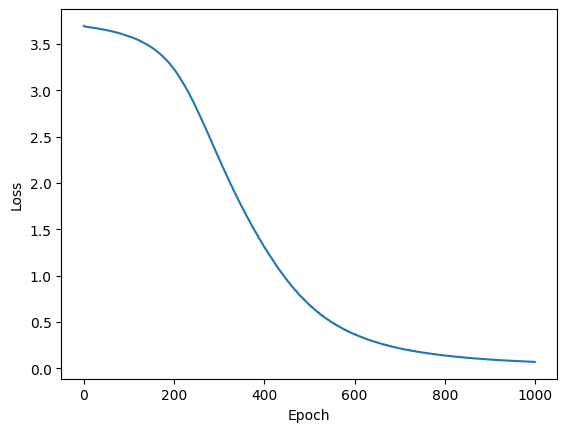

In [9]:
train_model(model,loss_fn,optimizer,train_loader,epochs)
draw_loss(loss_history)

In [10]:
#测试模型
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, target in test_loader:
        output = model(images.reshape(-1, 4096))
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
print(f'Accuracy: {correct/total*100}%')


Accuracy: 91.25%
